In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Feature Selection 

- It is a way of selecting the subset of the most relevent features from the original set of features
- It is achived by removing irrelevent, redudent and noisy features from the original set of features

# Advantages of feature selection

- 1. It help up to reduce overfitting 
- 2. It help us to improve model accuracy/score/performance
- 3. It reduces training and testing time
- 4. It help us to avoid curse of dimensionality

# Feature selection techniques
- 1. Filter Method
    - Done Before model training
    
- 2. Wrapper Method
    - Done At the time of model training
    
- 3. Embedded Method
    - Done After model training

#  1. Filter Method
- 1. Correlation:
    - 1.1 Pearson Correlation Coefficient 
        - Cont vs Cont
    - 1.2 Spearman's Correlation Coefficient 
        - Cont vs Cont
    - 1.3 Kendall Correlation Coefficient 
        - Cat vs Cont 
- 2. Information Gain
    - Mutual Information
- 3. Missing Value Ratio
- 4. Variance Threshold Method
- 5. Chi-Square Test
    - Cat vs Cat
- 6. ANOVA Test
    - Cat vs Cont
- 7. Mean Absolute Difference (MAD)

#  2. Wrapper Method
* It uses Machine Learning Models to find best subset of features
- 1. Forward Feature Selection
- 2. Backward Feature Elimination
- 3. Exhastive Feature Selection
- 4. Recursive Feature Selection
- 5. BiDirection Method

# 3. Embedded Method
- 1. Random Forest Feature Importance
- 2. AdaBoost Feature Importance
- 3. Regularization (L1 >> Lasso)

# 1. Filter Method
### 1.1 Correlation 

In [2]:
from sklearn.datasets import load_boston, load_diabetes, load_wine

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [6]:
df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837,-0.403964
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


### 2. Information Gain
- Information Gain determines reduction in entropy
- Entropy is nothing but the measure of impurity

In [7]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

<AxesSubplot:>

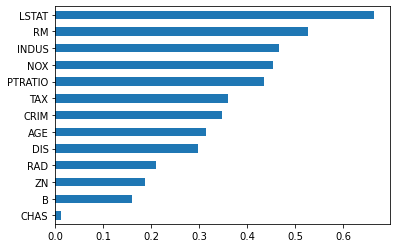

In [9]:
x = df.drop('Target',axis=1)
y = df['Target']
array = mutual_info_regression(x,y)
series1 = pd.Series(array,index=x.columns)
series1.sort_values().plot(kind='barh')

In [10]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
x = df_wine
y = pd.Series(wine.target)


<AxesSubplot:>

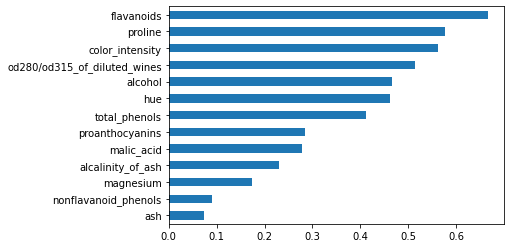

In [14]:
array = mutual_info_classif(x,y)
series1 = pd.Series(array,index=x.columns)
series1.sort_values().plot(kind='barh')

# 3. Missing Values Ratios

In [16]:
df.isna().mean() * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Target     0.0
dtype: float64

#  4. Variance Threshold Method

- Drops a variable which has variance equal to zero

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
df['Dummy1'] = 150
df['Dummy2'] = 250

In [19]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Dummy1,Dummy2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,150,250
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,150,250
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,150,250
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,150,250
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,150,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,150,250
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,150,250
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,150,250
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,150,250


In [20]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0.0)
var_threshold.fit(df)
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [21]:
var_threshold.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Target'], dtype=object)

In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Dummy1,Dummy2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,150,250
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,150,250
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,150,250
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,150,250
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,150,250


In [23]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0.7)
var_threshold.fit(df)
var_threshold.get_support()

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [29]:
var_threshold.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'Target'], dtype=object)

In [30]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target', 'Dummy1', 'Dummy2'],
      dtype='object')

In [31]:
list(var_threshold.get_feature_names_out())

['CRIM',
 'ZN',
 'INDUS',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Target']

In [32]:
var_threshold.get_feature_names_out().tolist()

['CRIM',
 'ZN',
 'INDUS',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Target']

In [33]:
df[var_threshold.get_feature_names_out().tolist()]

,CRIM,ZN,INDUS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 5. Chi-Square Test
- Cat vs Cat
- Sex Vs Survived

- Null Hypothesis      : Two variables are independent
- Alternate Hypothesis : Two variables are dependent

- p_value >  0.05 = Null Hypothesis will be true
- p_value <= 0.05 = Null Hypothesis will be false
    - We are accepting alternate hypothesis
    
- If Chi2 is High
    - 1. Feature is important
    - 2. p_value will be very low (< 0.05)
- If Chi2 is Low
    - 1. Feature is not important
    - 2. p_value will be High (> 0.05)

In [34]:
from sklearn.feature_selection import chi2,SelectKBest,SelectPercentile

In [36]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df_titanic['Embarked'].unique()

array([0., 1., 2.])

In [44]:
df_titanic['Gender'].replace({"male":0,"female":1},inplace=True)
df_titanic['Embarked'].replace({'S':0,"C":1,"Q":2},inplace=True)
df_titanic['Embarked'].fillna(0,inplace=True)


In [47]:
x = df_titanic.drop(['Survived','Name','Age','Cabin',"PassengerId",'Ticket'],axis=1)
x

,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,0.0
1,1,1,1,0,71.2833,1.0
2,3,1,0,0,7.9250,0.0
3,1,1,1,0,53.1000,0.0
4,3,0,0,0,8.0500,0.0
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,0.0
887,1,1,0,0,30.0000,0.0
888,3,1,1,2,23.4500,0.0
889,1,0,0,0,30.0000,1.0


In [48]:
y = df_titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
x.isna().sum()

Pclass      0
Gender      0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
#chi2,SelectKBest,SelectPercentile

In [52]:
chi_val , p_val = chi2(x,y)
chi_val

array([3.01152115e+01, 1.67853299e+02, 1.75295827e+00, 1.02436621e+01,
       4.46423694e+03, 1.23338898e+01])

In [53]:
p_val

array([4.07125230e-08, 2.17793226e-38, 1.85505268e-01, 1.37155024e-03,
       0.00000000e+00, 4.44808558e-04])

In [54]:
chi_df = pd.DataFrame({"Features":x.columns,"chi2_val":chi_val,"p_val":p_val})
chi_df

,Features,chi2_val,p_val
0,Pclass,30.115212,4.071252e-08
1,Gender,167.853299,2.177932e-38
2,SibSp,1.752958,1.855053e-01
3,Parch,10.243662,1.371550e-03
4,Fare,4464.236941,0.000000e+00
5,Embarked,12.333890,4.448086e-04


In [55]:
chi_df.loc[chi_df['p_val'] <= 0.05]

,Features,chi2_val,p_val
0,Pclass,30.115212,4.071252e-08
1,Gender,167.853299,2.177932e-38
3,Parch,10.243662,1.371550e-03
4,Fare,4464.236941,0.000000e+00
5,Embarked,12.333890,4.448086e-04


In [58]:
chi_df.sort_values('p_val',ascending=False)

,Features,chi2_val,p_val
2,SibSp,1.752958,1.855053e-01
3,Parch,10.243662,1.371550e-03
5,Embarked,12.333890,4.448086e-04
0,Pclass,30.115212,4.071252e-08
1,Gender,167.853299,2.177932e-38
4,Fare,4464.236941,0.000000e+00


In [59]:
best_features = SelectKBest(chi2,k=5)
best_features.fit(x,y)


SelectKBest(k=5, score_func=<function chi2 at 0x00000194EEC52E50>)

In [60]:
best_features.get_feature_names_out()

array(['Pclass', 'Gender', 'Parch', 'Fare', 'Embarked'], dtype=object)

In [61]:
df_titanic[best_features.get_feature_names_out().tolist()]

,Pclass,Gender,Parch,Fare,Embarked
0,3,0,0,7.2500,0.0
1,1,1,0,71.2833,1.0
2,3,1,0,7.9250,0.0
3,1,1,0,53.1000,0.0
4,3,0,0,8.0500,0.0
...,...,...,...,...,...
886,2,0,0,13.0000,0.0
887,1,1,0,30.0000,0.0
888,3,1,2,23.4500,0.0
889,1,0,0,30.0000,1.0


### 6. ANOVA Test
- Num Vs Cat

In [62]:
from sklearn.feature_selection import f_classif

In [63]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
x = df_wine
y = pd.Series(wine.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [64]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [65]:
f_val, p_val = f_classif(x,y)

In [66]:
f_val

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

In [67]:
p_val

array([3.31950380e-36, 4.12722880e-14, 4.14996797e-06, 9.44447294e-14,
       8.96339544e-06, 2.13767002e-28, 3.59858583e-50, 3.88804090e-11,
       5.12535874e-12, 1.16200802e-33, 5.91766222e-30, 1.39310496e-44,
       5.78316836e-47])

In [68]:
df_anaova = pd.DataFrame({'Features':x.columns,"f_val":f_val,"p_val":p_val})
df_anaova

,Features,f_val,p_val
0,alcohol,135.077624,3.319504e-36
1,malic_acid,36.943425,4.127229e-14
2,ash,13.312901,4.149968e-06
3,alcalinity_of_ash,35.771637,9.444473e-14
4,magnesium,12.429584,8.963395e-06
5,total_phenols,93.733010,2.137670e-28
6,flavanoids,233.925873,3.598586e-50
7,nonflavanoid_phenols,27.575417,3.888041e-11
8,proanthocyanins,30.271383,5.125359e-12
9,color_intensity,120.664018,1.162008e-33


<AxesSubplot:>

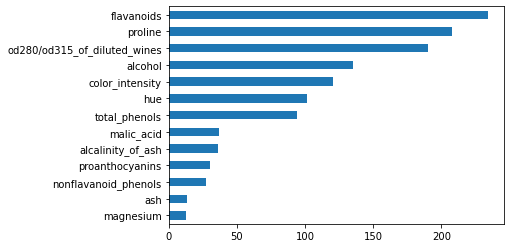

In [69]:
s1 = pd.Series(f_val,index=x.columns)
s1.sort_values().plot(kind='barh')

In [70]:
best_features = SelectPercentile(f_classif,percentile=50)
best_features.fit(x,y)

SelectPercentile(percentile=50)

In [72]:
x[best_features.get_feature_names_out().tolist()]

,alcohol,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,3.06,5.64,1.04,3.92,1065.0
1,13.20,2.76,4.38,1.05,3.40,1050.0
2,13.16,3.24,5.68,1.03,3.17,1185.0
3,14.37,3.49,7.80,0.86,3.45,1480.0
4,13.24,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...
173,13.71,0.61,7.70,0.64,1.74,740.0
174,13.40,0.75,7.30,0.70,1.56,750.0
175,13.27,0.69,10.20,0.59,1.56,835.0
176,13.17,0.68,9.30,0.60,1.62,840.0


In [73]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [74]:
best_features = SelectKBest(f_classif,k=8)
best_features.fit(x,y)

SelectKBest(k=8)

In [75]:
x[best_features.get_feature_names_out().tolist()]

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.80,3.06,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.65,2.76,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.80,3.24,5.68,1.03,3.17,1185.0
3,14.37,1.95,3.85,3.49,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.80,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70,0.64,1.74,740.0
174,13.40,3.91,1.80,0.75,7.30,0.70,1.56,750.0
175,13.27,4.28,1.59,0.69,10.20,0.59,1.56,835.0
176,13.17,2.59,1.65,0.68,9.30,0.60,1.62,840.0


# 2. Wrapper Method
- 1. Forward Feature Selection
- 2. Backward Feature Elimination
- 3. Exhastive Feature Selection
- 4. Recursive Feature Selection
- 5. BiDirection Method (Forward + Backward)

### 2.1 Forward Feature Selection

In [76]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

In [78]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [82]:
len(df_wine.columns)

13

In [79]:
x = df_wine
y = pd.Series(wine.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [80]:
log_clf = LogisticRegression()
sfs = SequentialFeatureSelector(log_clf,direction='forward')
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression())

In [84]:
len(sfs.get_feature_names_out())

6

In [86]:
array = sfs.get_support()
s1 = pd.Series(array,index=x.columns)
s1

alcohol                          True
malic_acid                      False
ash                              True
alcalinity_of_ash                True
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols             True
proanthocyanins                 False
color_intensity                 False
hue                              True
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [88]:
log_feat = sfs.get_feature_names_out()
log_feat

array(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'nonflavanoid_phenols', 'hue'], dtype=object)

In [90]:
x = df_wine
y = pd.Series(wine.target)

In [91]:
knn_clf = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_clf,direction='forward')
sfs.fit(x,y)

SequentialFeatureSelector(estimator=KNeighborsClassifier())

In [92]:
sfs.get_feature_names_out()

array(['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'hue', 'od280/od315_of_diluted_wines'], dtype=object)

In [93]:
array = sfs.get_support()
s1 = pd.Series(array,index=x.columns)
s1

alcohol                          True
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                    True
flavanoids                       True
nonflavanoid_phenols             True
proanthocyanins                 False
color_intensity                 False
hue                              True
od280/od315_of_diluted_wines     True
proline                         False
dtype: bool

In [94]:
knn_features = sfs.get_feature_names_out()
knn_features

array(['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'hue', 'od280/od315_of_diluted_wines'], dtype=object)

In [95]:
log_feat

array(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'nonflavanoid_phenols', 'hue'], dtype=object)

In [96]:
len(knn_features)

6

### 2.2 Backward Feature Elimination

In [97]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

In [98]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [99]:
x = df_wine
y = pd.Series(wine.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [100]:
log_clf = LogisticRegression()
sfs = SequentialFeatureSelector(log_clf,n_features_to_select=5,direction='backward')
sfs.fit(x,y)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=5)

In [101]:
array = sfs.get_support()
s1 = pd.Series(array,index=x.columns)
s1

alcohol                         False
malic_acid                       True
ash                             False
alcalinity_of_ash                True
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                  True
hue                             False
od280/od315_of_diluted_wines    False
proline                          True
dtype: bool

In [102]:
log_feat_back = sfs.get_feature_names_out()
log_feat_back

array(['malic_acid', 'alcalinity_of_ash', 'flavanoids', 'color_intensity',
       'proline'], dtype=object)

In [103]:
knn_clf = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_clf,n_features_to_select=5,direction='backward')
sfs.fit(x,y)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=5)

In [105]:
knn_feat_back = sfs.get_feature_names_out()
knn_feat_back

array(['alcohol', 'flavanoids', 'proanthocyanins', 'color_intensity',
       'hue'], dtype=object)

In [106]:
log_feat_back

array(['malic_acid', 'alcalinity_of_ash', 'flavanoids', 'color_intensity',
       'proline'], dtype=object)

In [107]:
log_feat

array(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'nonflavanoid_phenols', 'hue'], dtype=object)

In [108]:
knn_features

array(['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'hue', 'od280/od315_of_diluted_wines'], dtype=object)

### 2.3 Recursive Feature Selection 

In [110]:
from sklearn.feature_selection import RFE

In [111]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [112]:
log_clf = LogisticRegression()
rfe = RFE(log_clf,n_features_to_select=5)
rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [113]:
array = rfe.get_support()
s1 = pd.Series(array,index=x.columns)
s1

alcohol                          True
malic_acid                      False
ash                              True
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                  True
hue                             False
od280/od315_of_diluted_wines     True
proline                         False
dtype: bool

In [114]:
rfe.get_feature_names_out()

array(['alcohol', 'ash', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines'], dtype=object)

# 3. Embedded Methods
- 1. Regularization (L1 Regularization)
- 2. Tree-Based Feature Importance
    - 1. Random Forest Features Importance
    - 1. AdaBoost Features Importance
    - 1. XGBoost Forest Features Importance

In [117]:
# You19:05
# I shared a Jam file with the meeting: https://jamboard.google.com/d/1aE7fN8DzKpcwLV6TWBInNJV2K_Kw1SP8BRPJTb71i9Q/edit?usp=meet_whiteboard
# Prasad Adsule20:06
from sklearn.datasets import load_wine
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
a = load_wine()
x = pd.DataFrame(a.data, columns = a.feature_names)
y = a.target

log = LogisticRegression()
sfs= SequentialFeatureSelector(log,direction='forward')
sfs.fit(x,y)
array= sfs.get_support()
logfeat = pd.Series(array,index = x.columns)
logfeat

alcohol                          True
malic_acid                      False
ash                              True
alcalinity_of_ash                True
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols             True
proanthocyanins                 False
color_intensity                 False
hue                              True
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [118]:
sfs.get_feature_names_out()

array(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'nonflavanoid_phenols', 'hue'], dtype=object)

In [119]:
array= sfs.get_support()
array

array([ True, False,  True,  True, False, False,  True,  True, False,
       False,  True, False, False])

In [133]:
np.where(sfs.get_support() == True)[0]

array([ 0,  2,  3,  6,  7, 10], dtype=int64)

In [132]:
sfs.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False,  True, False, False])